## Основные концепции Machine Learning. Практическая работа

In [32]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rc('font', size = 18)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [5]:
phones = pd.read_csv('1.8_phones.csv')
phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


In [7]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   disk    100 non-null    int64 
 1   os      100 non-null    object
 2   price   100 non-null    int64 
 3   year    100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [ ]:
### Используя matplotlib сделать визуализацию загруженного датасета ###

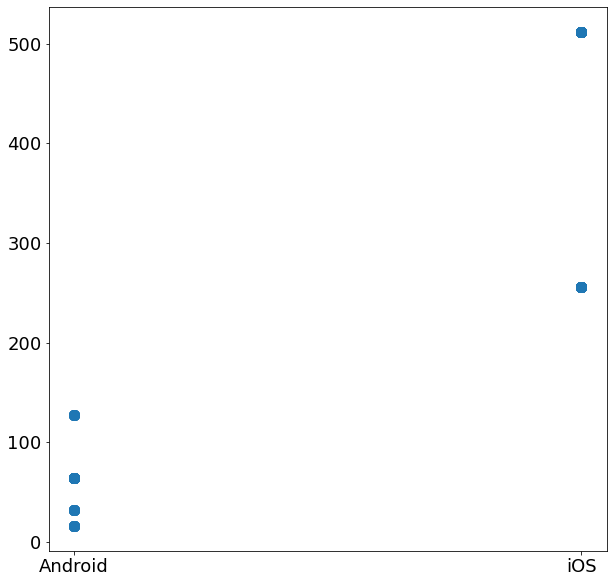

In [23]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()

ax.scatter(phones['year'], phones['price'], s= 100)
plt.show()

Задание 1: обучить модель регрессии

In [13]:
### Выгрузка в соответствующие переменные выбранные признаки ###
X = phones[['year', 'disk']]
y = phones['price']

In [ ]:
### Запуск процесса обучения ###
### и демонстрация работоспобность обученной модели ###

In [14]:
reg = LinearRegression().fit(X, y)

In [17]:
reg.predict(X[0:1])[0], y[0]

(7848.046694419114, 7256)

In [19]:
ye, d = list(), list()
for x in np.linspace(min(phones['year']), max(phones['year']), 100):
    for y in np.linspace(min(phones['disk']), max(phones['disk']), 100):
        ye.append(x)
        d.append(y)
ye = np.array(ye).reshape(-1, 1)
d = np.array(d).reshape(-1, 1)
p = reg.predict(np.concatenate([ye, d], axis=1))

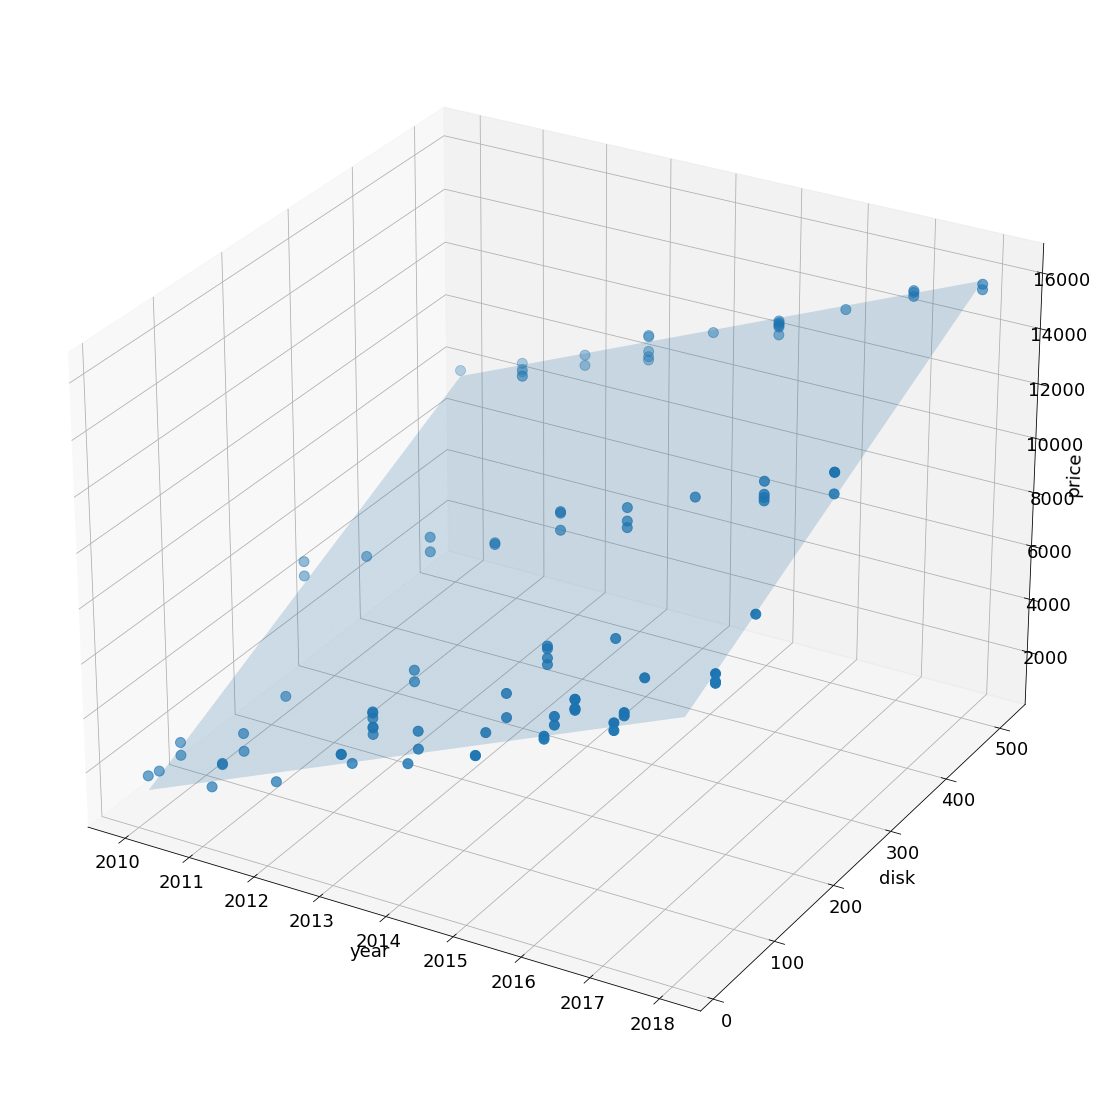

In [20]:
fig = plt.figure(figsize=(20, 20)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(phones['year'], phones['disk'], phones['price'], s=100)

# помещаем предсказанные значения на график
ax.plot_trisurf(ye.ravel(), d.ravel(), p.ravel(), alpha=0.2)


# называем оси
ax.set_xlabel('year')
ax.set_ylabel('disk')
ax.set_zlabel('price')


# изменяем позицию камеры и отрисовываем картинку
ax.elev = 27
plt.show()

Задание 2: обучить модель классификации

In [28]:
### Выгрузка в соответствующие переменные выбранные признаки ###
X = phones[['disk']]
y = phones['os']

In [ ]:
### Запуск процесса обучения ###
### и демонстрация работоспобности обученной модели ###

In [29]:
cl = DecisionTreeClassifier().fit(X, y)
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [31]:
cl.predict(X[0:1])[0] , y[0]

('Android', 'Android')

Задание 3: обучить модель кластеризации

In [58]:
### Выгрузка в соответствующие переменные выбранные признаки ###
X = phones[['disk']]
#X

In [ ]:
### Запуск процесса обучения ###
### и демонстрация работоспобности обученной модели ###

In [50]:
clust = KMeans(n_clusters=2).fit(X)

In [59]:
c1, c2 = clust.cluster_centers_

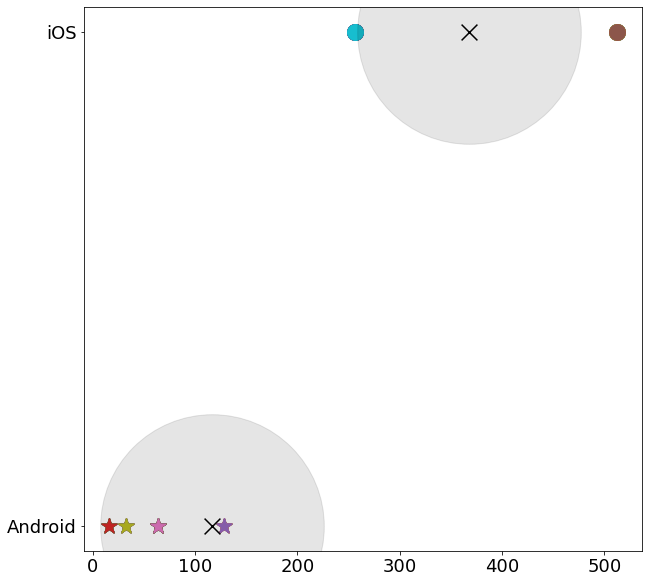

In [64]:
fig = plt.figure(figsize=(10,10))
markers = {'Android': '*', 'iOS': 'o'}
for d, os in zip(phones.disk, phones.os):
    plt.scatter(d, os, s=250, marker=markers[os])
plt.scatter(c1[0], 'Android', s=250, marker = 'x', c='black')
plt.scatter(c1[0], 'Android', s=250*2e2, c='black', alpha=0.1)
plt.scatter(c2[0], 'iOS', s=250, marker = 'x', c='black')
plt.scatter(c2[0], 'iOS', s=250*2e2, c='black', alpha= 0.1)

plt.show()